In [86]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [87]:
data = pd.read_csv('TimeSeries.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

     Month  Sales
0  2005-01  10827
1  2005-02  12049
2  2005-03  18298
3  2005-04  17834
4  2005-05  16480

 Data Types:
Month    object
Sales     int64
dtype: object


In [88]:
# The data contains a particular month and number of passengers travelling in that month. 
#In order to read the data as a time series, we have to pass special arguments to the 
#read_csv command:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('TimeSeries.csv', parse_dates=['Month'], 
                   index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())


 Parsed Data:
            Sales
Month            
2005-01-01  10827
2005-02-01  12049
2005-03-01  18298
2005-04-01  17834
2005-05-01  16480


In [89]:
data.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01'],
              dtype='datetime64[ns]', name='Month', length=153, freq=None)

In [90]:
#Convert to timeseries
ts = data['Sales']
ts.head(10)

Month
2005-01-01    10827
2005-02-01    12049
2005-03-01    18298
2005-04-01    17834
2005-05-01    16480
2005-06-01    16690
2005-07-01    15389
2005-08-01    13031
2005-09-01    17849
2005-10-01    16662
Name: Sales, dtype: int64

In [91]:
#Indexing time series arrays
ts['2005-01-01']

10827

In [92]:
#Import datetime library and use 'datetime' function
from datetime import datetime
ts[datetime(2005,1,1)]

10827

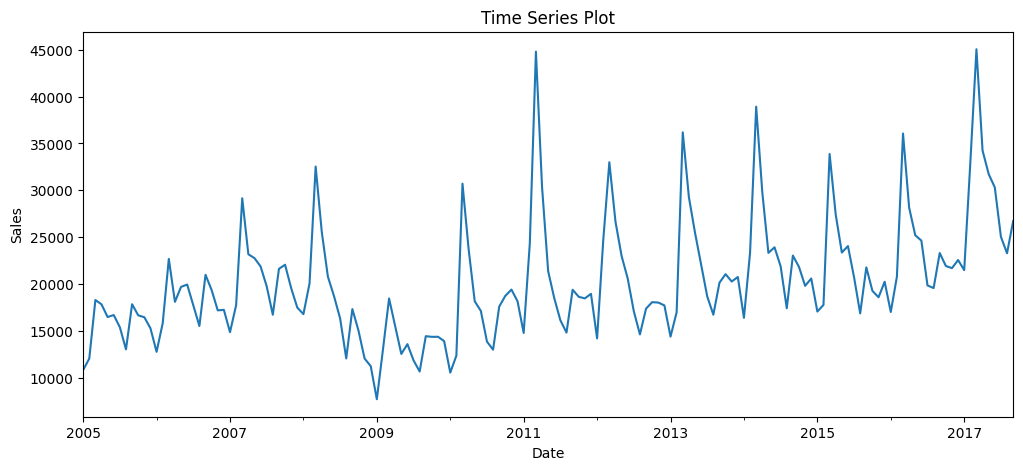

In [93]:
#GET RANGE
#PLOTTING THE TIME SERIES
#plt.plot(ts)

fig, ax = plt.subplots(figsize=(12, 5))
ts.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Time Series Plot')
plt.show()

## SUMMARY STATISTICS

In [94]:
from pandas import read_csv

X_new = data.values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17859.105263, mean2=22679.220779
variance1=32135852.304709, variance2=36859626.587620


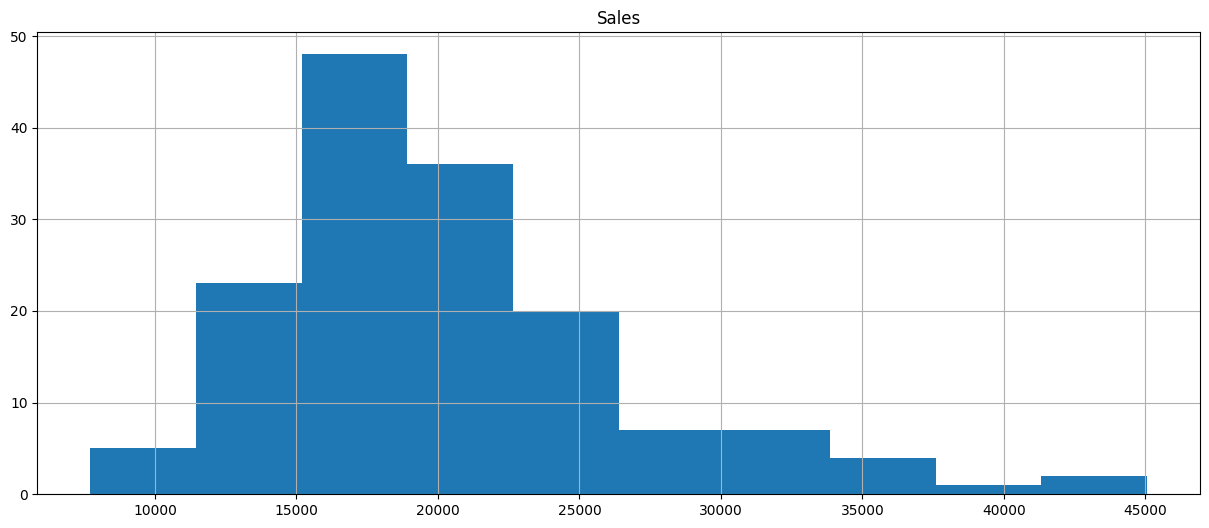

In [95]:
from matplotlib import pyplot
data.hist()
pyplot.show()

- Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, 
    and it looks like the seasonality component is growing.
- This may suggest an exponential growth from season to season. 
- A log transform can be used to flatten out exponential change back to a linear relationship.

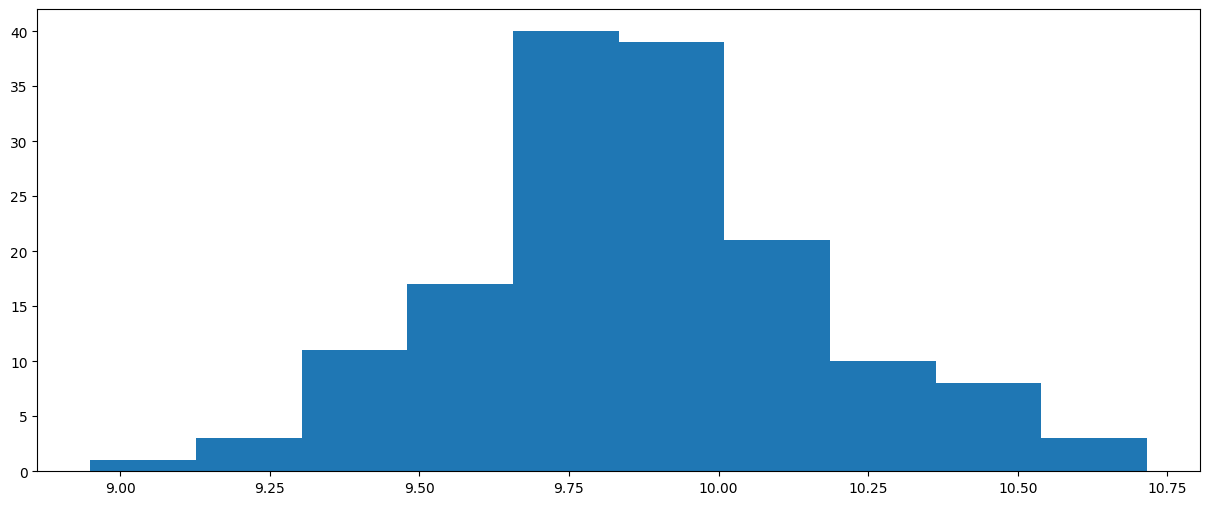

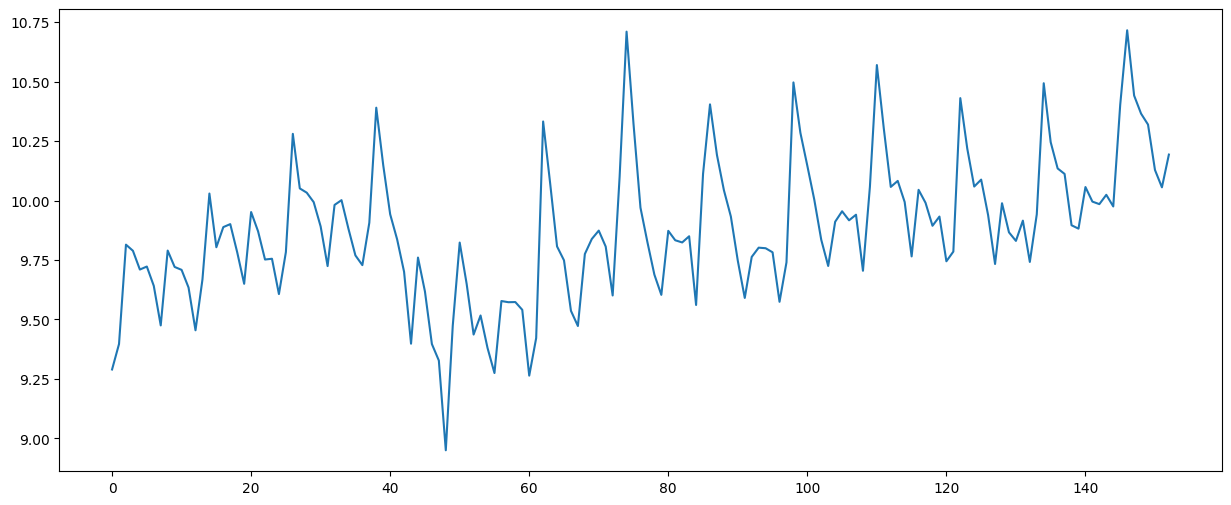

In [96]:
from numpy import log
X_log = log(data.values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

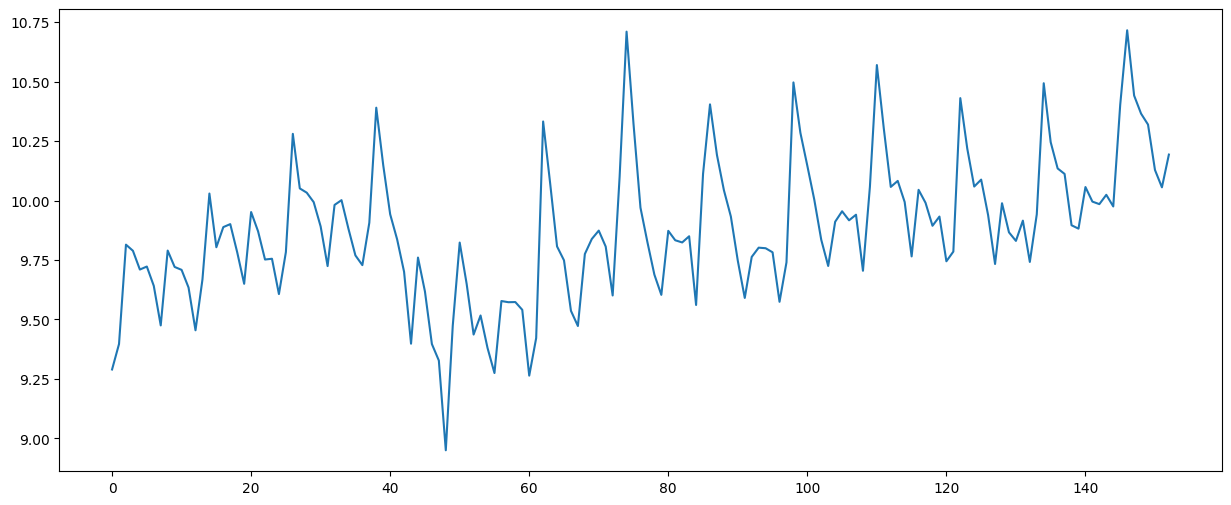

In [97]:
pyplot.plot(X_log)
pyplot.show()

In [98]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.
X_new_log = data.values
X_new_log = log(X_new_log)
split_log = len(X_new_log) / 2
X1_log, X2_log = X_new_log[0:int(split_log)], X_new_log[int(split_log):]
mean1_log, mean2_log = X1_log.mean(), X2_log.mean()
var1_log, var2_log = X1_log.var(), X2_log.var()
print('mean1=%f, mean2=%f' % (mean1_log, mean2_log))
print('variance1=%f, variance2=%f' % (var1_log, var2_log))

mean1=9.747423, mean2=9.997714
variance1=0.081881, variance2=0.059733


- This is a quick and dirty method that may be easily fooled. We could explore statistical significance tests

## STATISTICAL TEST

### Augmented Dickey Fuller Test

In [99]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

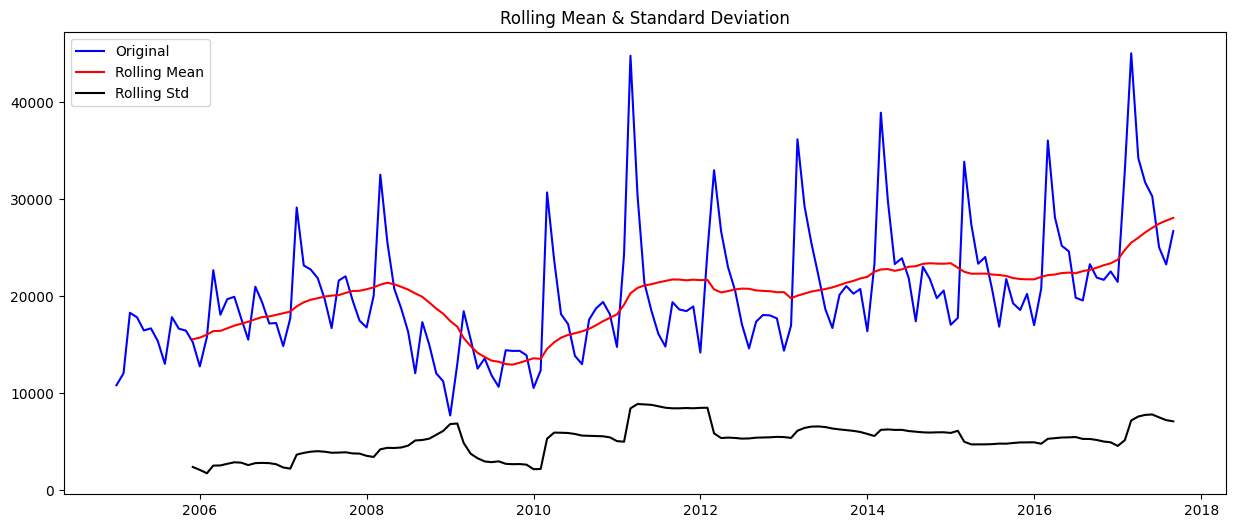

Results of Dickey-Fuller Test:
Test Statistic                  -1.285217
p-value                          0.635908
#Lags Used                      13.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [100]:
test_stationarity(ts)

This output is the result of the Augmented Dickey-Fuller (ADF) test, which is used to check for stationarity in time series data.

The test statistic value of -1.285217 is less than the critical values at all significance levels (1%, 5%, and 10%), meaning that we cannot reject the null hypothesis of non-stationarity in the data.

The p-value of 0.635908 is also greater than the significance level of 0.05, which further confirms that the data is non-stationary.

The number of lags used in the test is 13, and the number of observations used is 139.

In summary, the ADF test suggests that the data is non-stationary and requires further differencing or transformation to make it stationary.

## Transforming the data to Stationary - Using Log Transformation

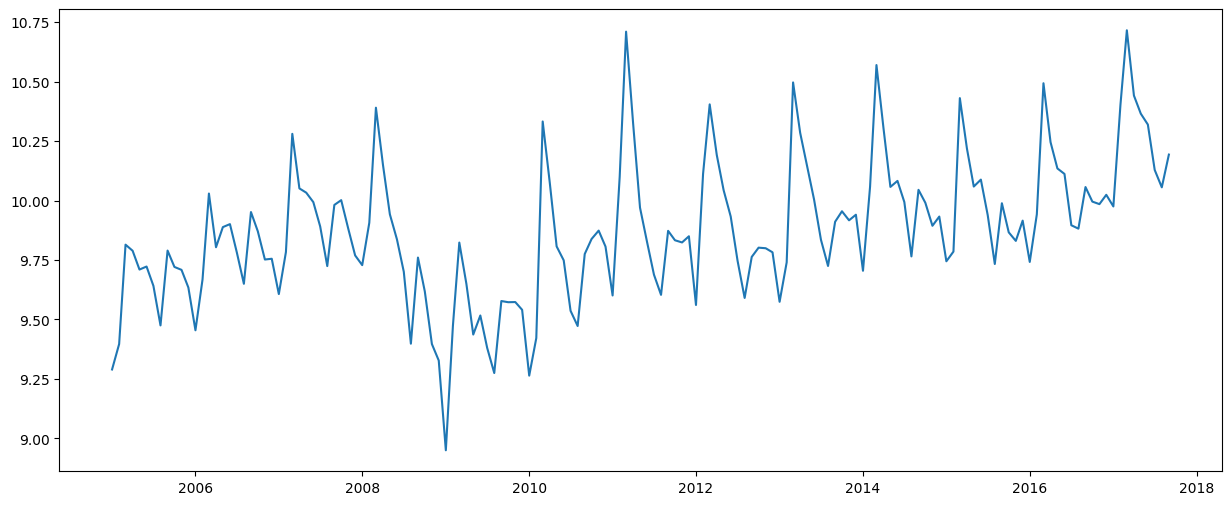

In [101]:
#MAKING TS STATIONARY

ts_log = np.log(ts)
plt.plot(ts_log)


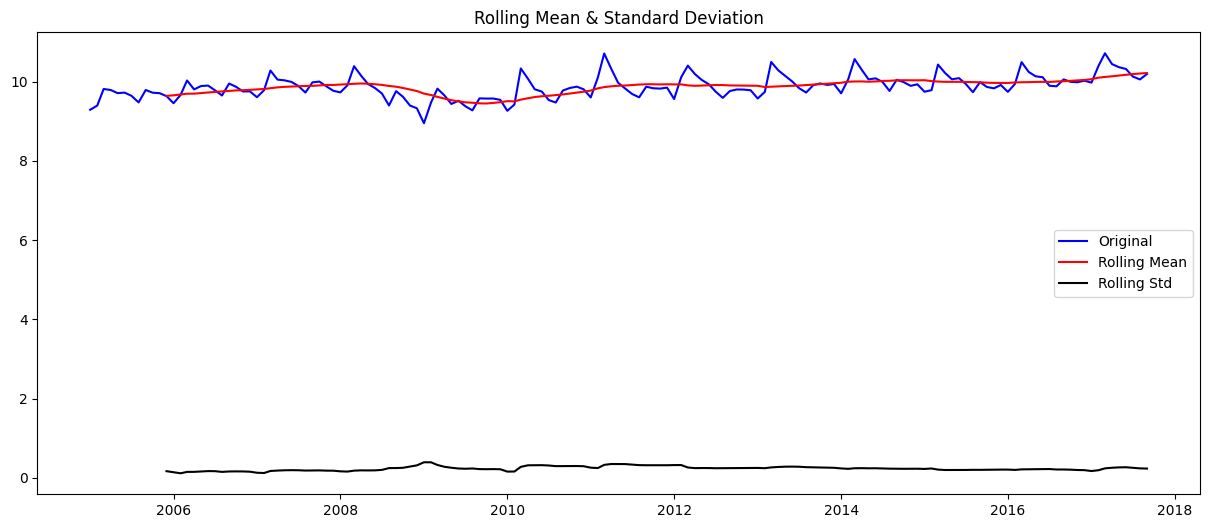

Results of Dickey-Fuller Test:
Test Statistic                  -1.997508
p-value                          0.287667
#Lags Used                      13.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [102]:
test_stationarity(ts_log)

This output is the result of the Dickey-Fuller test, which is a statistical test for testing the stationarity of a time series. The test returns several statistics and critical values that can be used to determine if the time series is stationary or not.

- The Test Statistic (-1.997508) is a negative number that measures how much the time series is drifting away from stationarity. The more negative this statistic is, the more evidence there is against the null hypothesis (the time series is non-stationary).
- The p-value (0.287667) is the probability of obtaining a test statistic as extreme as the one calculated from the data, assuming that the null hypothesis is true. If the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis and conclude that the time series is stationary. In this case, the p-value is greater than 0.05, so we fail to reject the null hypothesis and cannot conclude that the time series is stationary.
- The #Lags Used (13) is the number of lags used in the regression when the test was performed. This value is determined automatically by the test based on the sample size and other factors.
- The Number of Observations Used (139) is the number of observations used in the test.
- The Critical Values are the values at which the null hypothesis can be rejected with a given level of confidence (usually 99%, 95%, and 90%). If the Test Statistic is less than the Critical Value, we can reject the null hypothesis and conclude that the time series is stationary. In this case, the Test Statistic is greater than the Critical Values at all levels of confidence, so we cannot reject the null hypothesis and cannot conclude that the time series is stationary.

## Using Moving Average

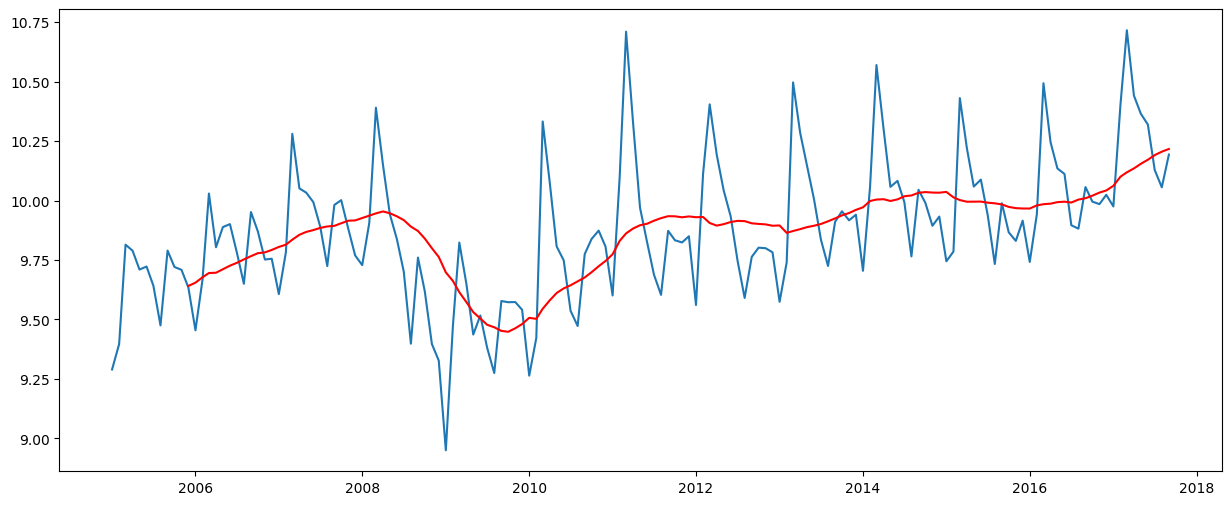

In [103]:
#Smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [104]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

Month
2005-01-01   NaN
2005-02-01   NaN
2005-03-01   NaN
2005-04-01   NaN
2005-05-01   NaN
Name: Sales, dtype: float64

In [105]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

Month
2005-12-01   -0.006730
2006-01-01   -0.200146
2006-02-01   -0.009296
2006-03-01    0.334173
2006-04-01    0.107147
Name: Sales, dtype: float64

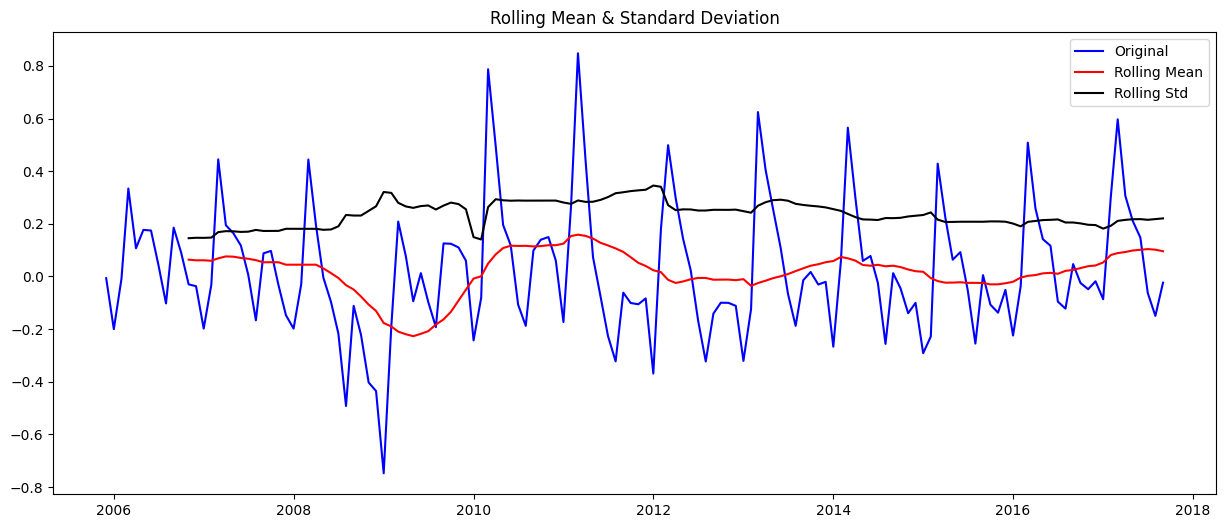

Results of Dickey-Fuller Test:
Test Statistic                  -3.619193
p-value                          0.005405
#Lags Used                      13.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [106]:
#TEST STATIONARITY AGAIN
test_stationarity(ts_log_moving_avg_diff)

This output shows the results of the Dickey-Fuller test, which is a statistical test used to determine if a time series is stationary or not. The test results are shown as follows:

- Test Statistic: This is the test statistic computed by the Dickey-Fuller test. It is a negative number and the more negative it is, the stronger the evidence against the null hypothesis (the time series is non-stationary).

- p-value: This is the probability value associated with the test statistic. It is compared to a pre-specified significance level (usually 0.05) to determine if the null hypothesis should be rejected. In this case, the p-value is less than the significance level, which suggests that we can reject the null hypothesis and conclude that the time series is stationary.

- #Lags Used: This is the number of lags used in the Dickey-Fuller test.

- Number of Observations Used: This is the number of observations used in the Dickey-Fuller test.

- Critical Value (1%): This is the critical value at the 1% significance level. If the test statistic is less than this value, we can reject the null hypothesis and conclude that the time series is stationary with 99% confidence.

- Critical Value (5%): This is the critical value at the 5% significance level. If the test statistic is less than this value, we can reject the null hypothesis and conclude that the time series is stationary with 95% confidence.

- Critical Value (10%): This is the critical value at the 10% significance level. If the test statistic is less than this value, we can reject the null hypothesis and conclude that the time series is stationary with 90% confidence.

## Exponential Techniques - Optional

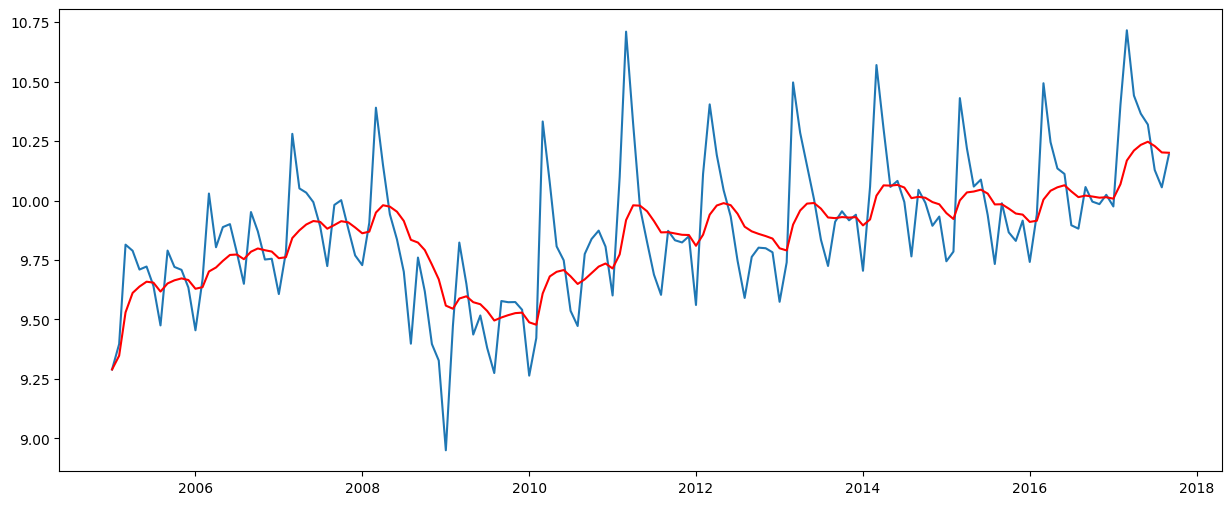

In [107]:
expwighted_avg = ts_log.ewm(span=12).mean() 
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

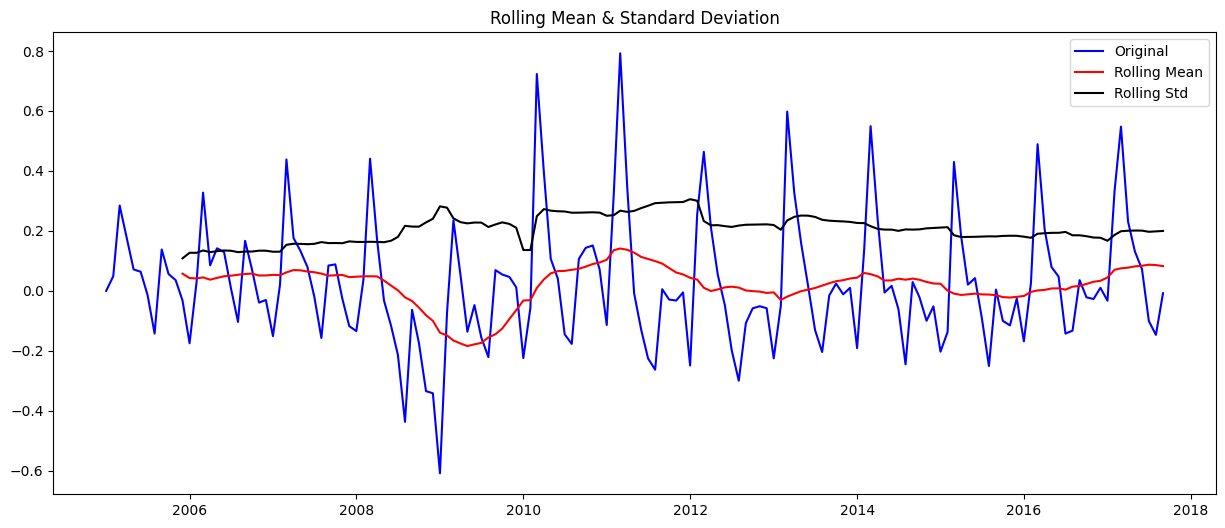

Results of Dickey-Fuller Test:
Test Statistic                  -3.082571
p-value                          0.027870
#Lags Used                      13.000000
Number of Observations Used    139.000000
Critical Value (1%)             -3.478294
Critical Value (5%)             -2.882568
Critical Value (10%)            -2.577983
dtype: float64


In [108]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [109]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log_moving_avg_diff)

In [110]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

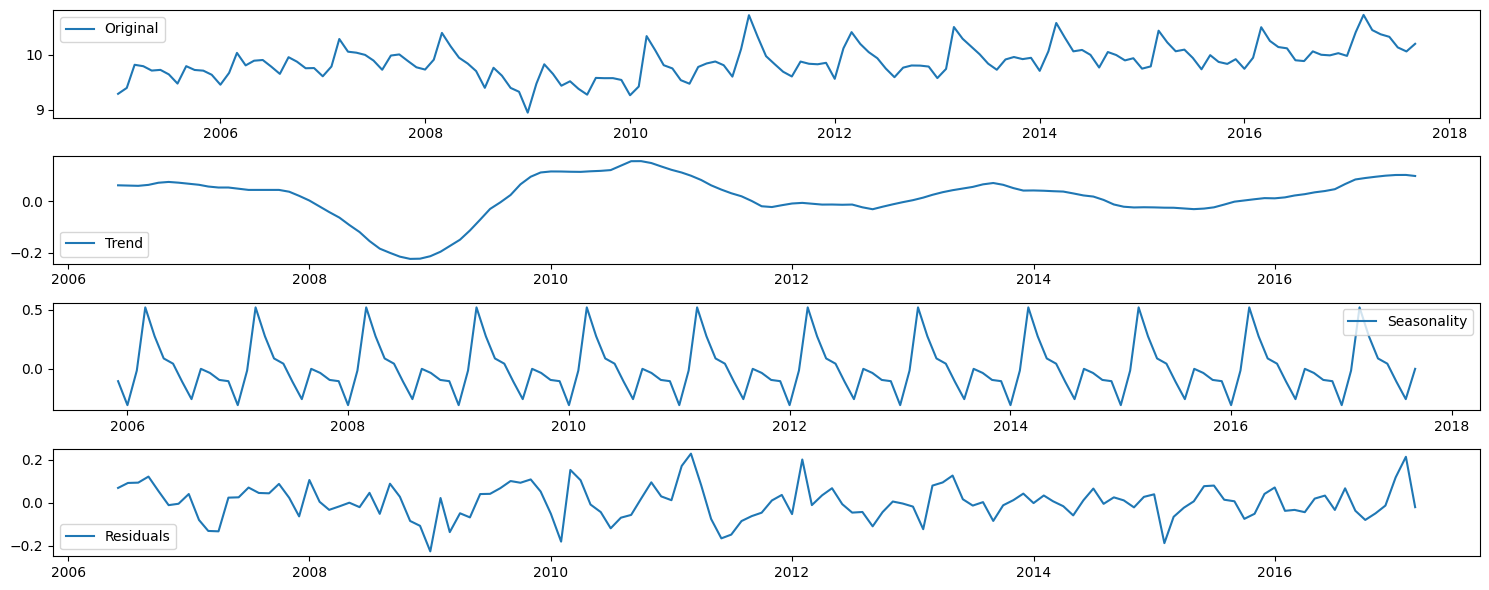

In [111]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

The figures shows the monthly sales from January 2005 to December 2009, along with the trend, seasonal, and residual components.
The trend component shows the overall pattern of the sales data with negative values indicating a decreasing trend and positive values indicating increasing trend while the seasonal component shows the regular patterns that occur within a year (such as seasonal fluctuations due to holidays or weather patterns). The residual component is the leftover variation in the data that is not explained by the trend or seasonal components.

# Checking the Stationary status of the Residual

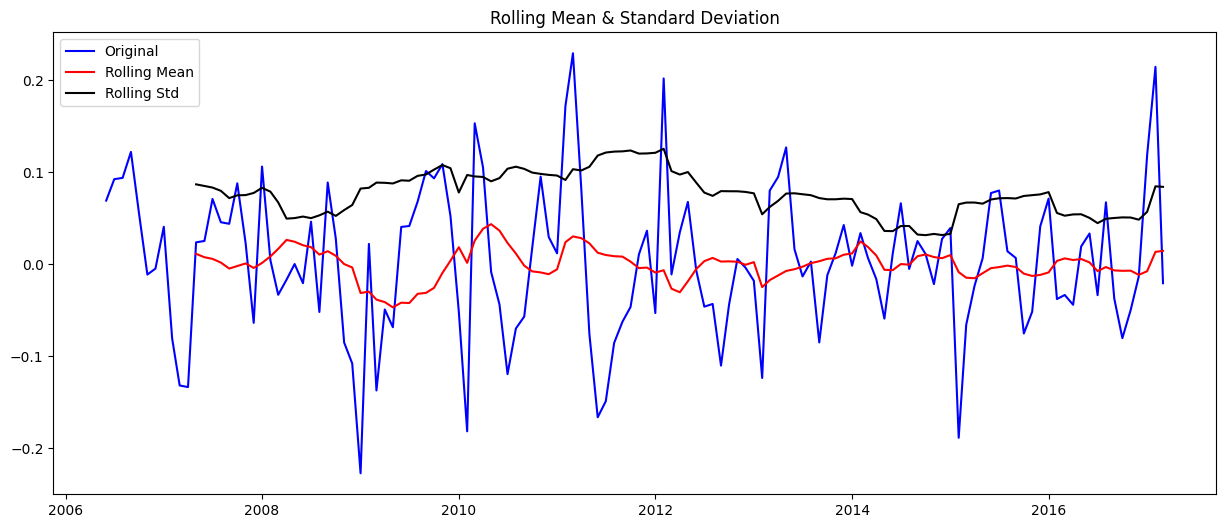

Results of Dickey-Fuller Test:
Test Statistic                -6.110064e+00
p-value                        9.379518e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.200000e+02
Critical Value (1%)           -3.486056e+00
Critical Value (5%)           -2.885943e+00
Critical Value (10%)          -2.579785e+00
dtype: float64


In [112]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The test statistic (-6.110064) is a measure of how strongly the data rejects the null hypothesis of non-stationarity. The lower the test statistic, the stronger the evidence against the null hypothesis. In this case, the test statistic is quite low, indicating strong evidence against non-stationarity.

The p-value (9.379518e-08) is the probability of observing a test statistic as extreme as the one computed, assuming the null hypothesis is true. The lower the p-value, the stronger the evidence against the null hypothesis. In this case, the p-value is very low, indicating very strong evidence against the null hypothesis.

The #Lags Used (9) is the number of lags included in the regression when computing the test statistic. The lag length is typically chosen based on a combination of statistical criteria and domain expertise.

The Critical Values are thresholds for the test statistic that are used to determine the rejection region for the null hypothesis. If the test statistic falls below the critical value, the null hypothesis is rejected. The critical values are chosen based on the level of significance chosen for the test (1%, 5%, or 10%). In this case, all three critical values are smaller than the test statistic, providing further evidence against the null hypothesis.

Since the test statistic is less than the critical values, we can reject the null hypothesis that the time series has a unit root and conclude that the time series is stationary.

Therefore, you can use the time series for forecasting sales with confidence that the time series is stationary.

## Forecasting

In [113]:
#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA

In [114]:
#ACF/PACF PLOTS

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [115]:
lag_acf = acf(ts_log_moving_avg_diff, nlags=20)
lag_pacf = pacf(ts_log_moving_avg_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

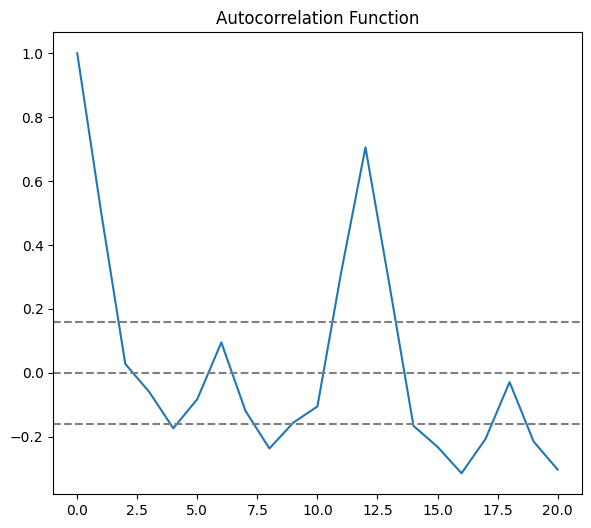

In [116]:
#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

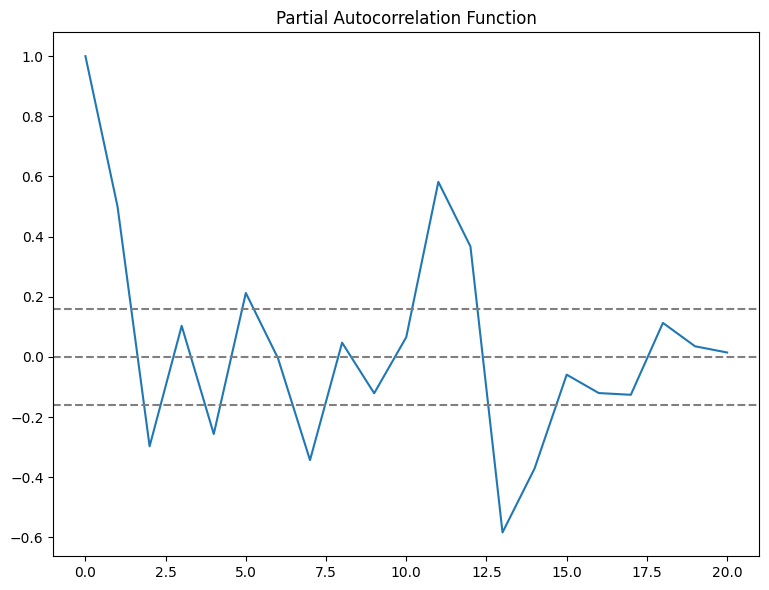

In [117]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## Finding the Best ARIMA model using Auto Arima

In [66]:
from pmdarima.arima import auto_arima

# Find the best SARIMA model
model = auto_arima(data['Sales'], seasonal=True, m=12, suppress_warnings=True)

# Print the model summary
print(model.summary())

C:\Users\User\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\User\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\User\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Users\U

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  153
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1418.426
Date:                              Tue, 09 May 2023   AIC                           2846.851
Time:                                      13:23:03   BIC                           2861.971
Sample:                                  01-01-2005   HQIC                          2852.993
                                       - 09-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1993      0.059     -3.358      0.001      -0.316      -0.083
ar.L2         -0.26

This is the output summary of the SARIMAX model that has been fitted to your data. SARIMAX stands for Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors. It is a statistical model used for time series forecasting.

The output summary provides information about the model's parameters and statistical tests to evaluate the goodness of fit of the model.

- Dep. Variable: y: This is the name of the dependent variable that you are trying to predict (in this case, sales).
- Model: SARIMAX(2, 1, 0)x(1, 0, [1], 12): This shows the order of the SARIMAX model. The first set of numbers (2, 1, 0) refers to the autoregressive, integrated, and moving average orders, respectively. The second set of numbers (1, 0, [1]) refers to the seasonal autoregressive, integrated, and moving average orders, respectively, with a seasonal period of 12 months.
- Log Likelihood: This is a measure of how well the model fits the data. A higher value indicates a better fit.
- AIC, BIC, and HQIC: These are information criteria used to compare different models. A lower value indicates a better fit.
- Coefficients: These are the estimated values of the model's parameters. They show how much the dependent variable is affected by changes in the independent variables.
- Standard errors: These show the degree of uncertainty around the estimated coefficients. A smaller standard error indicates a more precise estimate.
- P-values: These show the significance of each coefficient. A p-value less than 0.05 indicates that the coefficient is statistically significant.


In [143]:
ts_values=ts_log_moving_avg_diff.values

In [144]:
X = ts_values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [145]:
#MODEL BUILDING
#training will be 80%, test will be 20% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [146]:
history = [X for X in train]
predictions = list()
#test.reset_index()

In [156]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

# Initialize variables
history = [X for X in train]
predictions = list()

# Loop through the test set and make predictions
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        yhat = np.exp(yhat)  # apply exponential transformation
        predictions.append(yhat)
        obs = test[t]
        obs = np.exp(obs)  # apply exponential transformation
        history.append(np.log(obs))  # update the history with the log of obs
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))

# Calculate error metrics
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)



predicted=0.965480, expected=1.065752
predicted=1.161908, expected=1.096823
predicted=1.167043, expected=0.949039
predicted=0.943042, expected=0.774863
predicted=0.824747, expected=1.005090
predicted=1.078727, expected=0.898553
predicted=0.815879, expected=0.871403
predicted=0.911171, expected=0.950240
predicted=0.958055, expected=0.798986
predicted=0.778691, expected=0.963376
predicted=1.020226, expected=1.662755
predicted=1.512813, expected=1.295112
predicted=1.054331, expected=1.152264
predicted=1.278868, expected=1.123744
predicted=1.177466, expected=0.908867
predicted=0.927157, expected=0.884937
predicted=0.961481, expected=1.048139
predicted=1.050546, expected=0.975357
predicted=0.916722, expected=0.952733
predicted=0.980737, expected=0.981841
predicted=0.989315, expected=0.916982
predicted=0.909468, expected=1.352836
predicted=1.360493, expected=1.816734
predicted=1.545101, expected=1.358425
predicted=1.225342, expected=1.234973
predicted=1.390229, expected=1.159342
predicted=1.

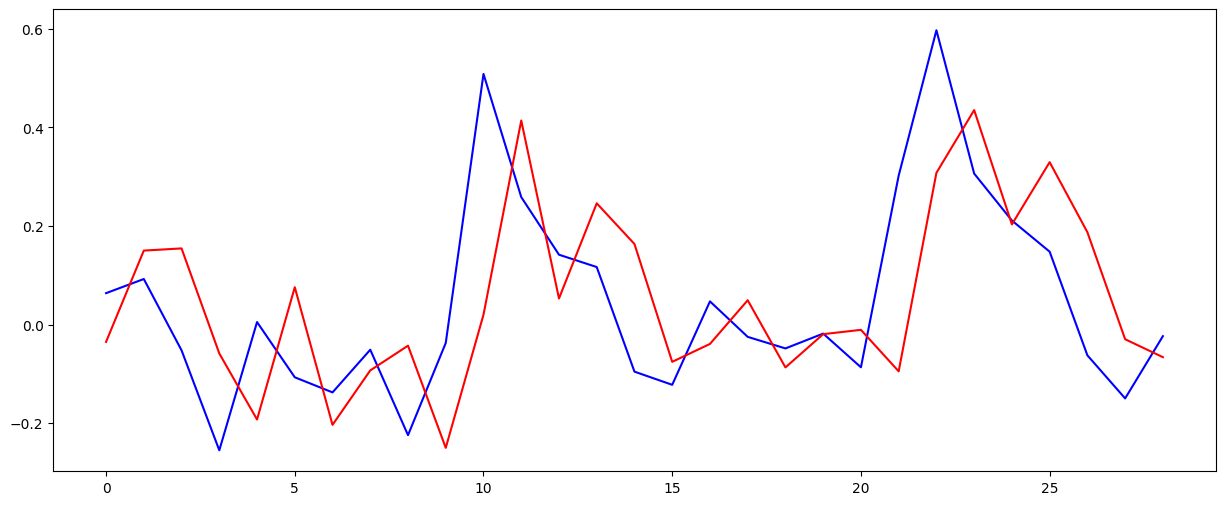

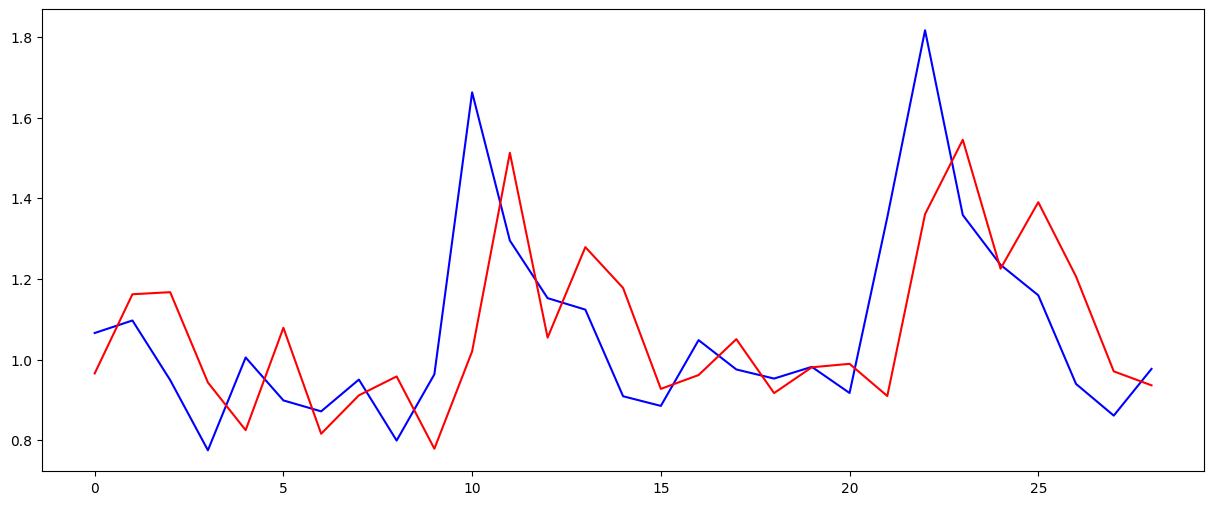

Mean Squarred Error: 0.22


In [150]:
#CHECKING ERROR
from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

# plot
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

# plot
pyplot.plot(np.exp(test), color = 'blue', label='test')   
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.show()

from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

In [157]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [158]:
data

,Sales,Log Moving Average
Month,,
2005-12-01,15280,-0.006730
2006-01-01,12767,-0.200146
2006-02-01,15805,-0.009296
2006-03-01,22685,0.334173
2006-04-01,18100,0.107147
...,...,...
2017-05-01,31739,0.211049
2017-06-01,30315,0.147852
2017-07-01,25046,-0.062440
